In [535]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns
import plotly.plotly as py
plotly.tools.set_credentials_file(username='divyasriram', api_key='iGmUjyoYqjoOnZeIKr1A')
import plotly.graph_objs as go

pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

I think it would be interesting to know how many unique text conversations occured during the time period of the data (5/11 to 7/15). That way we can better guage what fraction of texters responded to the survey.

## Variables That Seem To Not Play An Important Role (no relevance to current data set)

1) Contact ID

2) Legacy Comments

3) Comments

4) Language (There is none other than English in this data set - so is taking the survey in another language even an option?)

5) Tags

6) How Did You Hear About Us (shocked that all responses were 'NaN')

7) URL_Redirect - all responses were NaN


All the responses for 'How Did You Hear About Us' were 'NaN'. I tried to find out what kind options responders had to choose, but because all answers were NaN, I can't tell if they were given options to choose or if it was a write in question.

Let's look at the general data set, to get an understanding of things. 

Few things to note:
    
    o) The link to the survey with the questions didn't match the questions on record in this csv file
    (This made it hard to because some of the columns don't necessary make sense for answers to questions - example: race has an 'other' option listed in two columns)
    o) I don't know if texters take the survey multiple times (for each time they text in?) 
        ex) there are 13 records of a particular IP Address (But on multiple days/times)
    o) But there are some records on here from the same user where the survey submission was recorded twice
        - One survey submission was partial and the other was completed
        - the first submission was probably made without finishing the survey
    o) What does the column "Referer" mean? Where they found out about CTL?
    o) What exactly does partial versus completed submissions mean (if you're allowed to leave questions unanswered)?
    o) The survey is sometimes submitted too early (or incorrectly) and gets recorded as a partial submission several times before the completed survey is recorded.
    o) Is the link to the survey publically available? (That dilutes the legitimacy of the answers if any random person can happen upon the link and fill it out)

In [536]:
survey = pd.read_csv('../CTL_InternHomework/Texter_Survey_quant.csv')

In [537]:
survey.shape

(7073, 56)

Total number of survey respondents is 7073.

In [13]:
survey.head(1)

,Response ID,Time Started,Date Submitted,Status,Contact ID,Legacy Comments,Comments,Language,Referer,Extended Referer,SessionID,User Agent,Extended User Agent,Tags,IP Address,Longitude,Latitude,Country,City,State/Region,Postal,Less alone:Did you feel any of these as a result of your conversation?,Less depressed:Did you feel any of these as a result of your conversation?,Less overwhelmed:Did you feel any of these as a result of your conversation?,More hopeful:Did you feel any of these as a result of your conversation?,More confident:Did you feel any of these as a result of your conversation?,More in control:Did you feel any of these as a result of your conversation?,None of these:Did you feel any of these as a result of your conversation?,Conversation Hash,Returnee to Survey (skip Demographics)?,How likely are you to recommend Crisis Text Line to a friend or someone else?,"In your conversation, did you mention an experience or feelings that you have not shared with anyone else?","In the conversation, I believe my Crisis Counselor was genuinely concerned for my well-being.","In the conversation, I feel my Crisis Counselor cared about me even when I mentioned things that were uncomfortable for me to say.",My Crisis Counselor understood me.,The conversation gave me new ways of looking at what I texted in about.,"Almost done! The last few questions ask about your age, gender, etc. Some people choose to answer these because it may help us to understand how to better help others. Either is OK with us!",How old are you?,Do you consider yourself to be:,Other - Write In:Do you consider yourself to be:,Do you consider yourself to be:.1,Other - Write In:Do you consider yourself to be:.1,Prefer not to answer:What is your race or origin? (Select one or more),White:What is your race or origin? (Select one or more),Black or African American:What is your race or origin? (Select one or more),"Hispanic, Latino, or Spanish origin:What is your race or origin? (Select one or more)","Middle Eastern, North African, or Arab:What is your race or origin? (Select one or more)",Asian:What is your race or origin? (Select one or more),American Indian / Alaska Native:What is your race or origin? (Select one or more),Native Hawaiian or Other Pacific Islander:What is your race or origin? (Select one or more),Some other race or origin:What is your race or origin? (Select one or more),Some other race or origin:What is your race or origin? (Select one or more).1,How did you hear about us?,Last question: none of your previous responses will be shown to your Crisis Counselor. Is there anything you would like to say to your Crisis Counselor?,Note to Crisis Counselor:,URL Redirect
0,237,5/11/2016 16:08:48,5/11/2016 16:10:12,Complete,NaN,NaN,NaN,English,NaN,NaN,1462997328_57339150aa5496.57049364,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,NaN,70.214.110.234,-73.950302,40.762501,United States,New York,NY,10044,NaN,NaN,NaN,More hopeful,More confident,NaN,NaN,o1Qwj,0.0,10.0,Yes,5 (strongly agree),5 (strongly agree),5 (strongly agree),5 (strongly agree),"OK, show me the questions",25 - 34,Male,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, I'll leave a note for my Crisis Counselor",Great launch TC!,NaN


In [538]:
#Changing all punctuation in column names
survey.columns = [c.replace('/', '_') for c in survey.columns]
survey.columns = [c.replace(' ', '_') for c in survey.columns]
survey.columns = [c.replace('(', '_') for c in survey.columns]
survey.columns = [c.replace(')', '_') for c in survey.columns]
survey.columns = [c.replace(':', '_') for c in survey.columns]
survey.columns = [c.replace('?', '') for c in survey.columns]
survey.columns = [c.replace('-', '_') for c in survey.columns]
survey.columns = [c.replace('.', '_') for c in survey.columns]
survey.columns = [c.replace('!', '') for c in survey.columns]
survey.columns = [c.replace(',', '') for c in survey.columns]


In [15]:
survey.head(1)

,Response_ID,Time_Started,Date_Submitted,Status,Contact_ID,Legacy_Comments,Comments,Language,Referer,Extended_Referer,SessionID,User_Agent,Extended_User_Agent,Tags,IP_Address,Longitude,Latitude,Country,City,State_Region,Postal,Less_alone_Did_you_feel_any_of_these_as_a_result_of_your_conversation,Less_depressed_Did_you_feel_any_of_these_as_a_result_of_your_conversation,Less_overwhelmed_Did_you_feel_any_of_these_as_a_result_of_your_conversation,More_hopeful_Did_you_feel_any_of_these_as_a_result_of_your_conversation,More_confident_Did_you_feel_any_of_these_as_a_result_of_your_conversation,More_in_control_Did_you_feel_any_of_these_as_a_result_of_your_conversation,None_of_these_Did_you_feel_any_of_these_as_a_result_of_your_conversation,Conversation_Hash,Returnee_to_Survey__skip_Demographics_,How_likely_are_you_to_recommend_Crisis_Text_Line_to_a_friend_or_someone_else,In_your_conversation_did_you_mention_an_experience_or_feelings_that_you_have_not_shared_with_anyone_else,In_the_conversation_I_believe_my_Crisis_Counselor_was_genuinely_concerned_for_my_well_being_,In_the_conversation_I_feel_my_Crisis_Counselor_cared_about_me_even_when_I_mentioned_things_that_were_uncomfortable_for_me_to_say_,My_Crisis_Counselor_understood_me_,The_conversation_gave_me_new_ways_of_looking_at_what_I_texted_in_about_,Almost_done_The_last_few_questions_ask_about_your_age_gender_etc__Some_people_choose_to_answer_these_because_it_may_help_us_to_understand_how_to_better_help_others__Either_is_OK_with_us,How_old_are_you,Do_you_consider_yourself_to_be_,Other___Write_In_Do_you_consider_yourself_to_be_,Do_you_consider_yourself_to_be__1,Other___Write_In_Do_you_consider_yourself_to_be__1,Prefer_not_to_answer_What_is_your_race_or_origin__Select_one_or_more_,White_What_is_your_race_or_origin__Select_one_or_more_,Black_or_African_American_What_is_your_race_or_origin__Select_one_or_more_,Hispanic_Latino_or_Spanish_origin_What_is_your_race_or_origin__Select_one_or_more_,Middle_Eastern_North African_or_Arab_What_is_your_race_or_origin__Select_one_or_more_,Asian_What_is_your_race_or_origin__Select_one_or_more_,American_Indian___Alaska_Native_What_is_your_race_or_origin__Select_one_or_more_,Native_Hawaiian_or_Other_Pacific_Islander_What_is_your_race_or_origin__Select_one_or_more_,Some_other_race_or_origin_What_is_your_race_or_origin__Select_one_or_more_,Some_other_race_or_origin_What_is_your_race_or_origin__Select_one_or_more__1,How_did_you_hear_about_us,Last_question__none_of_your_previous_responses_will_be_shown_to_your_Crisis_Counselor__Is_there_anything_you_would_like_to_say_to_your_Crisis_Counselor,Note_to_Crisis_Counselor_,URL_Redirect
0,237,5/11/2016 16:08:48,5/11/2016 16:10:12,Complete,NaN,NaN,NaN,English,NaN,NaN,1462997328_57339150aa5496.57049364,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,NaN,70.214.110.234,-73.950302,40.762501,United States,New York,NY,10044,NaN,NaN,NaN,More hopeful,More confident,NaN,NaN,o1Qwj,0.0,10.0,Yes,5 (strongly agree),5 (strongly agree),5 (strongly agree),5 (strongly agree),"OK, show me the questions",25 - 34,Male,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, I'll leave a note for my Crisis Counselor",Great launch TC!,NaN


In [539]:
#survey = survey.rename(columns = {'':''})

#changing long column names
survey = survey.rename(columns = {'Returnee_to_Survey__skip_Demographics_?':'Returnee_to_Survey_Skip_Demographics'})
survey = survey.rename(columns = {'Almost_done_The_last_few_questions_ask_about_your_age_gender_etc__Some_people_choose_to_answer_these_because_it_may_help_us_to_understand_how_to_better_help_others__Either_is_OK_with_us':'Ok_To_Ask_Demographic_Questions'})	
survey = survey.rename(columns = {'How_old_are_you': 'Age'})
survey = survey.rename(columns = {'How_likely_are_you_to_recommend_Crisis_Text_Line_to_a_friend_or_someone_else':'Likely_To_Recommend'})
survey = survey.rename(columns = {'In_your_conversation_did_you_mention_an_experience_or_feelings_that_you_have_not_shared_with_anyone_else':'Shared_Secret_Stuff'})
survey = survey.rename(columns = {'In_the_conversation_I_believe_my_Crisis_Counselor_was_genuinely_concerned_for_my_well_being_':'Counselor_Concerned_WellBeing'})
survey = survey.rename(columns = {'My_Crisis_Counselor_understood_me_':'Counselor_Understood_Me'})
survey = survey.rename(columns = {'In_the_conversation_I_feel_my_Crisis_Counselor_cared_about_me_even_when_I_mentioned_things_that_were_uncomfortable_for_me_to_say_':'Counselor_Cared_Uncomf_Things'})
survey = survey.rename(columns = {'The_conversation_gave_me_new_ways_of_looking_at_what_I_texted_in_about_':'New_Ways_To_Think'})




#changing column names for question about conversation
survey = survey.rename(columns = {'Less_alone_Did_you_feel_any_of_these_as_a_result_of_your_conversation':'Less_Alone'})
survey = survey.rename(columns = {'Less_depressed_Did_you_feel_any_of_these_as_a_result_of_your_conversation':'Less_Depressed'})
survey = survey.rename(columns = {'Less_overwhelmed_Did_you_feel_any_of_these_as_a_result_of_your_conversation':'Less_Overwhelmed'})
survey = survey.rename(columns = {'More_hopeful_Did_you_feel_any_of_these_as_a_result_of_your_conversation':'More_Hopeful'})
survey = survey.rename(columns = {'More_confident_Did_you_feel_any_of_these_as_a_result_of_your_conversation':'More_Confident'})
survey = survey.rename(columns = {'More_in_control_Did_you_feel_any_of_these_as_a_result_of_your_conversation':'More_In_Control'})
survey = survey.rename(columns = {'None_of_these_Did_you_feel_any_of_these_as_a_result_of_your_conversation':'None_Of_These'})


#changing column names for demographic question
survey = survey.rename(columns = {'Prefer_not_to_answer_What_is_your_race_or_origin__Select_one_or_more_':'Race_Pref_Not_Answer'})
survey = survey.rename(columns = {'White_What_is_your_race_or_origin__Select_one_or_more_':'White'})
survey = survey.rename(columns = {'Black_or_African_American_What_is_your_race_or_origin__Select_one_or_more_':'Black_AfAm'})
survey = survey.rename(columns = {'Hispanic_Latino_or_Spanish_origin_What_is_your_race_or_origin__Select_one_or_more_':'Hispanic'})
survey = survey.rename(columns = {'Middle_Eastern_North\xc2\xa0African_or_Arab_What_is_your_race_or_origin__Select_one_or_more_':'Middle_Eastern'})
survey = survey.rename(columns = {'Asian_What_is_your_race_or_origin__Select_one_or_more_':'Asian'})
survey = survey.rename(columns = {'American_Indian___Alaska_Native_What_is_your_race_or_origin__Select_one_or_more_':'Native_Indian_Alaskan'})
survey = survey.rename(columns = {'Native_Hawaiian_or_Other_Pacific_Islander_What_is_your_race_or_origin__Select_one_or_more_':'Native_Hawaiian_or_Other_Pacific_Islander'})
survey = survey.rename(columns = {'Some_other_race_or_origin_What_is_your_race_or_origin__Select_one_or_more_':'Other_Race_Option'})
survey = survey.rename(columns = {'Some_other_race_or_origin_What_is_your_race_or_origin__Select_one_or_more__1':'Other_Race_Write_In'})
survey = survey.rename(columns = {'Do_you_consider_yourself_to_be__1':'Sexual_Orientation_Options'})
survey = survey.rename(columns = {'Other___Write_In_Do_you_consider_yourself_to_be__1':'Sexual_Orientation_Write_In'})
survey = survey.rename(columns = {'Do_you_consider_yourself_to_be_':'Gender'})
survey = survey.rename(columns = {'Other___Write_In_Do_you_consider_yourself_to_be_':'Gender_Other_Write_In'})




In [540]:
survey['Counselor_Understood_Me'].value_counts()

5 (strongly agree)                3439
4 (somewhat agree)                1841
3 (neither agree nor disagree)     688
1 (strongly disagree)              410
2 (somewhat disagree)              372
Name: Counselor_Understood_Me, dtype: int64

In [542]:
survey = survey.replace('5 (strongly agree)', 5)
survey = survey.replace('4 (somewhat agree)', 4)
survey = survey.replace('3 (neither agree nor disagree)', 3)
survey = survey.replace('2 (somewhat disagree)', 2)
survey = survey.replace('1 (strongly disagree)', 1)

In [470]:
survey.head(1)

,Response_ID,Time_Started,Date_Submitted,Status,Referer,Extended_Referer,SessionID,User_Agent,Extended_User_Agent,IP_Address,Longitude,Latitude,Country,City,State_Region,Postal,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Conversation_Hash,Returnee_to_Survey__skip_Demographics_,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Ok_To_Ask_Demographic_Questions,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In,diff_month,diff_day,diff_hour,diff_minute,5 (strongly agree)
0,237,2016-05-11 16:08:48,2016-05-11 16:10:12,Complete,NaN,NaN,1462997328_57339150aa5496.57049364,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,70.214.110.234,-73.950302,40.762501,United States,New York,NY,10044,NaN,NaN,NaN,More hopeful,More confident,NaN,NaN,o1Qwj,0.0,10.0,Yes,5 (strongly agree),5 (strongly agree),5 (strongly agree),5 (strongly agree),"OK, show me the questions",25 - 34,Male,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,5


As I did some exploratory analysis on the variables, I identified variables (in the beginning of this doc) that seem not not add value to this data set, so I will drop these columns.

In [543]:
#dropping columns for unneeded variables
    
drop_list = ['Contact_ID', 'Legacy_Comments', 'Comments', 'Language', 'Tags', 'How_did_you_hear_about_us', 'Last_question__none_of_your_previous_responses_will_be_shown_to_your_Crisis_Counselor__Is_there_anything_you_would_like_to_say_to_your_Crisis_Counselor', 'Note_to_Crisis_Counselor_', 'URL_Redirect']
survey = survey.drop(drop_list, 1)


In [544]:
survey.head(1)

,Response_ID,Time_Started,Date_Submitted,Status,Referer,Extended_Referer,SessionID,User_Agent,Extended_User_Agent,IP_Address,Longitude,Latitude,Country,City,State_Region,Postal,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Conversation_Hash,Returnee_to_Survey__skip_Demographics_,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Ok_To_Ask_Demographic_Questions,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In
0,237,5/11/2016 16:08:48,5/11/2016 16:10:12,Complete,NaN,NaN,1462997328_57339150aa5496.57049364,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,70.214.110.234,-73.950302,40.762501,United States,New York,NY,10044,NaN,NaN,NaN,More hopeful,More confident,NaN,NaN,o1Qwj,0.0,10.0,Yes,5.0,5.0,5.0,5.0,"OK, show me the questions",25 - 34,Male,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [545]:
survey.loc[survey['IP_Address'] == '69.121.21.169']

,Response_ID,Time_Started,Date_Submitted,Status,Referer,Extended_Referer,SessionID,User_Agent,Extended_User_Agent,IP_Address,Longitude,Latitude,Country,City,State_Region,Postal,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Conversation_Hash,Returnee_to_Survey__skip_Demographics_,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Ok_To_Ask_Demographic_Questions,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In
2169,2406,5/29/2016 12:11:53,5/29/2016 12:15:02,Partial,NaN,NaN,1464538313_574b14c9e6a0d9.48957760,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...,69.121.21.169,-73.639503,40.665901,United States,Rockville Centre,NY,11570,NaN,NaN,NaN,NaN,NaN,NaN,None of these,NaN,NaN,10.0,Not sure,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2170,2407,5/29/2016 12:16:26,5/29/2016 12:22:53,Complete,NaN,NaN,1464538586_574b15da198bf2.93071085,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...,69.121.21.169,-73.639503,40.665901,United States,Rockville Centre,NY,11570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OK, show me the questions",NaN,NaN,NaN,NaN,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2171,2408,5/29/2016 12:29:27,5/29/2016 12:30:16,Partial,NaN,NaN,1464539367_574b18e77502c7.78668755,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...,69.121.21.169,-73.639503,40.665901,United States,Rockville Centre,NY,11570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2305,2542,5/30/2016 17:50:11,5/30/2016 17:50:15,Partial,NaN,NaN,1464645011_574cb59347c4a1.71441334,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...,69.121.21.169,-73.639503,40.665901,United States,Rockville Centre,NY,11570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
survey['IP_Address'].value_counts()

104.10.131.153               13
107.77.161.2                  6
104.0.2.89                    6
68.134.21.146                 6
162.228.182.184               6
174.54.96.167                 5
69.123.178.92                 5
96.248.93.17                  5
172.10.120.195                5
216.165.237.51                5
108.51.233.93                 5
75.138.175.137                5
173.52.86.186                 5
99.35.161.193                 4
67.61.94.141                  4
72.22.241.44                  4
38.81.156.238                 4
173.31.189.58                 4
173.16.151.141                4
107.77.169.2                  4
98.165.117.197                4
100.2.31.29                   4
69.121.21.169                 4
74.44.163.58                  4
69.42.14.249                  4
75.1.195.163                  4
207.179.104.132               4
73.20.44.24                   4
71.120.133.96                 4
72.184.219.38                 3
166.170.0.92                  3
75.44.11

In [22]:
survey.loc[(survey['IP_Address'] == '205.197.242.156') | (survey['IP_Address'] == '70.194.10.146') | (survey['IP_Address'] == '71.231.29.130')]

,Response_ID,Time_Started,Date_Submitted,Status,Referer,Extended_Referer,SessionID,User_Agent,Extended_User_Agent,IP_Address,Longitude,Latitude,Country,City,State_Region,Postal,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Conversation_Hash,Returnee_to_Survey__skip_Demographics_,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Ok_To_Ask_Demographic_Questions,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In
147,384,5/12/2016 23:06:02,5/12/2016 23:09:41,Complete,NaN,NaN,1463108762_5735449a4e5c20.01484158,Mozilla/5.0 (iPhone; CPU iPhone OS 9_1 like Ma...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_1 like Ma...,71.231.29.130,-121.995300,47.406101,United States,Maple Valley,WA,98038,Less alone,Less depressed,Less overwhelmed,More hopeful,More confident,More in control,NaN,erldL,0.0,10.0,Yes,5 (strongly agree),5 (strongly agree),5 (strongly agree),5 (strongly agree),"OK, show me the questions",14 - 17,Female,NaN,Bisexual,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,Some other race or origin,NaN
228,465,5/13/2016 19:50:07,5/13/2016 19:51:02,Complete,NaN,NaN,1463183407_5736682f125f24.81361725,Mozilla/5.0 (iPhone; CPU iPhone OS 9_1 like Ma...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_1 like Ma...,71.231.29.130,-121.995300,47.406101,United States,Maple Valley,WA,98038,Less alone,Less depressed,Less overwhelmed,More hopeful,More confident,More in control,NaN,erldL,0.0,10.0,Yes,4 (somewhat agree),5 (strongly agree),5 (strongly agree),5 (strongly agree),"No, don't show me the questions",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
472,709,5/15/2016 15:54:52,5/15/2016 15:55:36,Partial,NaN,NaN,1463342092_5738d40c79b6d8.80222657,Mozilla/5.0 (Linux; Android 5.1; Z813 Build/LM...,Mozilla/5.0 (Linux; Android 5.1; Z813 Build/LM...,205.197.242.156,-97.821999,37.750999,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None of these,m5ZL1,0.0,10.0,No,3 (neither agree nor disagree),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2064,2301,5/28/2016 6:22:45,5/28/2016 6:25:05,Complete,NaN,NaN,1464430965_574971757b43e4.57410362,Mozilla/5.0 (Linux; Android 5.1; HTC Desire 62...,Mozilla/5.0 (Linux; Android 5.1; HTC Desire 62...,205.197.242.156,-97.821999,37.750999,United States,NaN,NaN,NaN,Less alone,NaN,NaN,NaN,NaN,NaN,NaN,yR2PN,0.0,5.0,Not sure,3 (neither agree nor disagree),3 (neither agree nor disagree),3 (neither agree nor disagree),1 (strongly disagree),"OK, show me the questions",25 - 34,Male,NaN,Bisexual,NaN,NaN,NaN,Black or African American,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5913,6150,7/5/2016 2:07:27,7/5/2016 2:07:32,Partial,NaN,NaN,1467698847_577b4e9f8a6b84.65721010,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...,70.194.10.146,-83.422203,42.723701,United States,Clarkston,MI,48346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yYRB0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5914,6151,7/5/2016 2:07:39,7/5/2016 2:09:08,Complete,NaN,NaN,1467698859_577b4eabd96802.09233465,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_3_2 like ...,70.194.10.146,-83.422203,42.723701,United States,Clarkston,MI,48346,NaN,NaN,Less overwhelmed,NaN,NaN,NaN,NaN,yYRB0,1.0,6.0,Not sure,4 (somewhat agree),3 (neither agree nor disagree),5 (strongly agree),3 (neither agree nor disagree),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Looks like sometimes the same IP_Address is actually used to submit to different surveys after two different text exchanges

In [23]:
survey.loc[survey['Status'] == 'Partial'].IP_Address.value_counts()

172.10.120.195               4
69.121.21.169                3
66.51.181.25                 3
72.168.128.97                2
70.95.7.126                  2
75.171.190.132               2
104.166.245.7                2
70.215.19.188                2
70.231.17.179                2
74.113.164.38                2
70.209.192.125               2
69.78.225.247                2
96.253.206.221               2
172.56.28.43                 2
172.56.16.182                2
199.212.87.72                2
107.77.173.12                2
166.170.0.113                2
66.87.115.84                 2
74.88.65.189                 2
104.247.55.102               2
67.2.17.189                  2
76.88.96.252                 2
98.165.96.74                 2
216.4.56.159                 1
66.206.216.82                1
97.46.198.230                1
172.56.27.206                1
23.116.125.204               1
71.12.23.155                 1
166.170.5.23                 1
172.56.27.28                 1
174.23.1

In [24]:
survey.loc[survey['IP_Address'] == '172.10.120.195']

,Response_ID,Time_Started,Date_Submitted,Status,Referer,Extended_Referer,SessionID,User_Agent,Extended_User_Agent,IP_Address,Longitude,Latitude,Country,City,State_Region,Postal,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Conversation_Hash,Returnee_to_Survey__skip_Demographics_,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Ok_To_Ask_Demographic_Questions,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In
3141,3378,6/6/2016 21:09:39,6/6/2016 21:09:45,Partial,NaN,NaN,1465261779_57561ed392e0f5.35621878,Mozilla/5.0 (Linux; Android 4.4.2; X301 - Lock...,Mozilla/5.0 (Linux; Android 4.4.2; X301 - Lock...,172.10.120.195,-90.073799,29.939301,United States,New Orleans,LA,70130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pq8aW,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3142,3379,6/6/2016 21:09:48,6/6/2016 21:15:39,Partial,NaN,NaN,1465261788_57561edcddf093.23332110,Mozilla/5.0 (Linux; Android 4.4.2; X301 - Lock...,Mozilla/5.0 (Linux; Android 4.4.2; X301 - Lock...,172.10.120.195,-90.073799,29.939301,United States,New Orleans,LA,70130,Less alone,NaN,Less overwhelmed,NaN,NaN,More in control,NaN,pq8aW,0.0,8.0,Yes,5 (strongly agree),5 (strongly agree),5 (strongly agree),5 (strongly agree),"OK, show me the questions",22 - 24,Female,NaN,Gay or Lesbian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Indian / Alaska Native,NaN,Some other race or origin,NaN
3157,3394,6/6/2016 23:27:45,6/6/2016 23:28:54,Partial,NaN,NaN,1465270065_57563f31a9bf40.76159572,Mozilla/5.0 (Linux; Android 4.4.2; X301 - Lock...,Mozilla/5.0 (Linux; Android 4.4.2; X301 - Lock...,172.10.120.195,-90.073799,29.939301,United States,New Orleans,LA,70130,Less alone,NaN,NaN,More hopeful,NaN,More in control,NaN,pq8aW,0.0,9.0,Yes,5 (strongly agree),5 (strongly agree),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3158,3395,6/6/2016 23:29:37,6/6/2016 23:32:24,Partial,NaN,NaN,1465270177_57563fa1c18627.93553788,Mozilla/5.0 (Linux; Android 4.4.2; X301 - Lock...,Mozilla/5.0 (Linux; Android 4.4.2; X301 - Lock...,172.10.120.195,-90.073799,29.939301,United States,New Orleans,LA,70130,Less alone,NaN,Less overwhelmed,More hopeful,NaN,NaN,NaN,pq8aW,0.0,9.0,Yes,5 (strongly agree),5 (strongly agree),5 (strongly agree),5 (strongly agree),"OK, show me the questions",18 - 21,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3159,3396,6/6/2016 23:32:52,6/7/2016 7:55:10,Complete,NaN,NaN,1465270372_575640640d8a48.87281717,Mozilla/5.0 (Linux; Android 4.4.2; X301 - Lock...,Mozilla/5.0 (Linux; Android 4.4.2; X301 - Lock...,172.10.120.195,-90.073799,29.939301,United States,New Orleans,LA,70130,Less alone,NaN,NaN,More hopeful,NaN,More in control,NaN,pq8aW,0.0,8.0,Yes,5 (strongly agree),5 (strongly agree),5 (strongly agree),5 (strongly agree),"OK, show me the questions",22 - 24,Female,NaN,Gay or Lesbian,NaN,NaN,NaN,NaN,NaN,NaN,NaN,American Indian / Alaska Native,NaN,NaN,NaN


In this case, this user submitted 4 partial surveys and 1 completed survey. The survey is sometimes submitted too early (or incorrectly) and gets recorded as a partial submission several times before the completed survey is recorded.

I want to check what each variable means (I removed a lot of these queries I conducted, unless they were important). But to do this efficiently, I created a subset of the survey dataframe that doesn't include the questions/answers.

Of the 7073 submissions, 6631 of them were completed, or 93.75%. That's pretty good. But the actual rate is higher because we haven't tossed out the partially completed survey repeats before the completed version was turned in.

# ------------------------------------------------------------------------------------------

# LOCATION

Working with survey data, the information is self reported allowing for bias. However there are a few things in this survey that are picked up through cell phone GPS information such as Longitude and Latitude. It's most likely that the 'Country' and 'State_Region' columns are automatically filled as well (but there's a slight chance these columns couldbe filled in my survey respondents themselves). 

NOTE: value_counts does not include NaN responses

In [546]:
survey.head(2)

,Response_ID,Time_Started,Date_Submitted,Status,Referer,Extended_Referer,SessionID,User_Agent,Extended_User_Agent,IP_Address,Longitude,Latitude,Country,City,State_Region,Postal,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Conversation_Hash,Returnee_to_Survey__skip_Demographics_,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Ok_To_Ask_Demographic_Questions,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In
0,237,5/11/2016 16:08:48,5/11/2016 16:10:12,Complete,NaN,NaN,1462997328_57339150aa5496.57049364,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,70.214.110.234,-73.950302,40.762501,United States,New York,NY,10044,NaN,NaN,NaN,More hopeful,More confident,NaN,NaN,o1Qwj,0.0,10.0,Yes,5.0,5.0,5.0,5.0,"OK, show me the questions",25 - 34,Male,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,238,5/11/2016 16:25:06,5/11/2016 16:25:31,Partial,NaN,NaN,1462998306_573395226833d1.73804460,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,67.244.79.198,-73.942200,40.839901,United States,New York,NY,10032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG4WK,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 36 missing values for the country.

In [342]:
survey.Country.value_counts()

United States           7022
Mexico                     3
Italy                      2
Canada                     2
Puerto Rico                1
Virgin Islands, U.S.       1
India                      1
United Arab Emirates       1
Spain                      1
Guatemala                  1
Israel                     1
France                     1
Name: Country, dtype: int64

In [304]:
survey.Country.isnull().sum()

36

Interesting that there are only 36 missing pieces of information for country but 405 missing pieces of info for state.

In [547]:
survey.loc[(survey['Country'] == 'United States') &(survey['City'].notnull())].shape

(6425, 47)

Create a subset dataframe for surveys with just surveys that have the country column filled out. 

I'm interested in examining the spread of survey information across the United States so let's keep only those in the US (even if the state is not specified).

In [548]:
location = survey.loc[survey['Country'] == 'United States']

There are 7022 surveys that have been taken in the United States.

In [549]:
location.shape

(7022, 47)

In [552]:
location.State_Region.value_counts()

CA    778
TX    572
NY    432
FL    330
PA    302
IL    287
OH    283
MI    268
GA    210
WA    198
NJ    194
VA    190
MD    180
NC    169
WI    151
AZ    142
MA    138
CO    133
MO    126
MN    125
IN    121
TN    113
UT    104
OR     95
CT     76
AL     75
KY     74
IA     74
KS     72
LA     65
SC     64
OK     61
NV     48
NE     45
AR     40
ID     38
MT     28
NM     26
DC     24
ME     24
MS     23
WV     21
RI     21
HI     21
AK     17
VT     16
SD     16
DE     13
NH     12
ND     11
WY      7
Name: State_Region, dtype: int64

In [553]:
state_counts = location['State_Region'].value_counts()
state_names = location['State_Region'].value_counts().index.tolist()

In [554]:
#for col in df.columns:
 #   df[col] = df[col].astype(str)

scl = [[0.0, 'rgb(242,240,247)'],[0.2, 'rgb(218,218,235)'],[0.4, 'rgb(188,189,220)'],\
            [0.6, 'rgb(158,154,200)'],[0.8, 'rgb(117,107,177)'],[1.0, 'rgb(84,39,143)']]


data = [ dict(
        type='choropleth',
        colorscale = scl,
        autocolorscale = False,
        locations = state_names,
        z = state_counts.astype(float),
        locationmode = 'USA-states',
        #text = df['text'],
        marker = dict(
            line = dict (
                color = 'rgb(255,255,255)',
                width = 2
            ) ),
        colorbar = dict(
            title = "Number of Surveys")
        ) ]

layout = dict(
        title = 'Number of CTL Surveys Taken by State<br>(Hover for breakdown)',
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showlakes = True,
            lakecolor = 'rgb(255, 255, 255)'),
             )
    
fig = dict( data=data, layout=layout )
py.iplot( fig, filename='d3-cloropleth-map' )

Create a subset dataframe for cities

In [556]:
include_city_columns = ['Response_ID', 'Longitude', 'Latitude', 'Country', 'City', 'State_Region']
city_location = location[include_city_columns]

In [557]:
city_location.head(5)

,Response_ID,Longitude,Latitude,Country,City,State_Region
0,237,-73.950302,40.762501,United States,New York,NY
1,238,-73.942200,40.839901,United States,New York,NY
2,239,-84.299400,39.352200,United States,Mason,OH
3,240,-96.242897,41.102798,United States,Gretna,NE
4,241,-83.718803,42.641399,United States,Hartland,MI


There a total of 2116 cities which together make total of 6425 surveys.

Use the following template to create general groupings for survey responses by city.

In [387]:
city_location.City.value_counts()

Chicago                99
Houston                99
Los Angeles            75
Brooklyn               63
Dallas                 52
New York               50
Phoenix                48
San Antonio            48
Philadelphia           46
Denver                 46
Atlanta                43
Salt Lake City         40
Minneapolis            38
San Jose               34
Seattle                34
Orlando                34
Portland               33
San Diego              32
Bronx                  31
Indianapolis           30
Las Vegas              30
Charlotte              28
Miami                  26
Kansas City            25
Washington             25
Baltimore              25
Richmond               24
Oakland                23
Saint Paul             22
Monroe                 22
Austin                 22
Columbus               22
Sacramento             22
Springfield            22
Madison                22
Cleveland              22
Milwaukee              21
Jackson                21
Arlington   

In [558]:
city_counts = city_location['City'].value_counts()
city_names = city_location['City'].value_counts().index.tolist()

In [ ]:
city_location[.sort_index(by='count', ascending=[False])

In [421]:
len(city_names)

2116

Create a new dataframe to mark average long/latitude for all surveys taken for each city.

In [559]:
city_avg_coords = pd.DataFrame()
city_avg_coords['City_Count'] = city_counts
city_avg_coords['City'] = city_names
city_avg_coords['avg_long'] = city_location['Longitude'].groupby(city_location['City']).mean()
city_avg_coords['avg_lat'] = city_location['Latitude'].groupby(city_location['City']).mean()

In [560]:
city_avg_coords.shape

(2116, 4)

In [561]:
((city_avg_coords.City.value_counts()<=9) & (city_avg_coords.City.value_counts() <= 9)).value_counts()

True    2116
Name: City, dtype: int64

In [562]:
city_avg_coords

,City_Count,City,avg_long,avg_lat
Chicago,99,Chicago,-87.685537,41.870297
Houston,99,Houston,-95.409828,29.766800
Los Angeles,75,Los Angeles,-118.268154,34.023183
Brooklyn,63,Brooklyn,-73.938923,40.672735
Dallas,52,Dallas,-95.705941,33.051073
New York,50,New York,-73.975318,40.760424
Phoenix,48,Phoenix,-112.077264,33.498739
San Antonio,48,San Antonio,-98.527277,29.493856
Philadelphia,46,Philadelphia,-75.146275,39.981443
Denver,46,Denver,-104.924522,39.735535


In [449]:
long_values = city_avg_coords['avg_long']
lat_values = city_avg_coords['avg_lat']


In [445]:
city_avg_coords['text'] = city_avg_coords['City'] + '<br>' + city_avg_coords['City_Count'].astype(str)

In [555]:
city_avg_coords['text'] = city_avg_coords['City'] + '<br>' + city_avg_coords['City_Count'].astype(str)
limits = [(0,2),(3,12), (13,21), (22,41), (42,100), (101, 2116)]
    # 0-1      : survey count 99 per city
    # 2-11     : survey count 40-75 per city
    # 12-20    : survey count 30-38 per city
    # 21-40    : survey count 20-28 per city
    # 41-99    : survey count 10-18 per city 
    # 100-2115 : survey count 0-9 per city
    
colors = ["rgb(0,0,255)","rgb(255,0,0)","rgb(204,0,204)",
          "rgb(255,128,0)", "rgb(0,255,0)", "rgb(255,255,255)"]

key_names = ['Cities with 99 Surveys', 'Cities with 40-75 Surveys', 'Cities with 30-38 Surveys',
            'Cities with 20-28 Surveys', 'Cities with 10-18 Surveys', 'Cities with Less Than 10 Surveys']

cities = []
scale = 6

for i in range(len(limits)):
    lim = limits[i]
    df_sub = city_avg_coords[lim[0]:lim[1]]
    city = dict(
        type = 'scattergeo',
        locationmode = 'USA-states',
        lon = df_sub['avg_long'],
        lat = df_sub['avg_lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['City_Count']*scale,
            color = colors[i],
            line = dict(width=0.5, color='rgb(40,40,40)'),
            sizemode = 'area'
        ),
        name = key_names[i])#'{0} - {1}'.format(lim[0],lim[1]) )
    cities.append(city)

    layout = dict(
        title = 'CTL Surveys Submitted - By Cities <br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope='usa',
            projection=dict( type='albers usa' ),
            showland = True,
            landcolor = 'rgb(0,0,0)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        ),
    )

fig = dict( data=cities, layout=layout )
py.iplot( fig, validate=False, filename='d3-bubble-map-populations' )

DC is considered as a state.

# -------------------------------------------------------------------------

# Age, Gender, Sexuality (Advertising + Marketing)

In [563]:
survey.head(2)

,Response_ID,Time_Started,Date_Submitted,Status,Referer,Extended_Referer,SessionID,User_Agent,Extended_User_Agent,IP_Address,Longitude,Latitude,Country,City,State_Region,Postal,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Conversation_Hash,Returnee_to_Survey__skip_Demographics_,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Ok_To_Ask_Demographic_Questions,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In
0,237,5/11/2016 16:08:48,5/11/2016 16:10:12,Complete,NaN,NaN,1462997328_57339150aa5496.57049364,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,70.214.110.234,-73.950302,40.762501,United States,New York,NY,10044,NaN,NaN,NaN,More hopeful,More confident,NaN,NaN,o1Qwj,0.0,10.0,Yes,5.0,5.0,5.0,5.0,"OK, show me the questions",25 - 34,Male,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,238,5/11/2016 16:25:06,5/11/2016 16:25:31,Partial,NaN,NaN,1462998306_573395226833d1.73804460,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_5...,67.244.79.198,-73.942200,40.839901,United States,New York,NY,10032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OG4WK,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### GENDER

Out of 7073 surveys submitted, 5550 have information about gender.

In [564]:
survey.loc[survey['Gender'].notnull()].shape

(5550, 47)

It's possible to write in what gender (or no gender labels) that you identify with. All of the write in options are marked as 'Other - Write In' in the Gender category. There are no surveys submitted with the Gender column marked NaN and the 'Gender_Other_Write_in' filled in.

In [600]:
survey.loc[(survey['Gender'].isnull()) & (survey['Gender_Other_Write_In'].notnull())]

,Response_ID,Time_Started,Date_Submitted,Status,Referer,Extended_Referer,SessionID,User_Agent,Extended_User_Agent,IP_Address,Longitude,Latitude,Country,City,State_Region,Postal,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Conversation_Hash,Returnee_to_Survey__skip_Demographics_,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Ok_To_Ask_Demographic_Questions,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In


Of the 5550 responders that filled in the Gender question, 115 surveys were marked with a 'write in' answer. To keep things simple, we will not parse through all those answers at this moment. We will work with categorizing the non write in data.

In [566]:
survey.loc[(survey['Gender'].notnull()) & (survey['Gender_Other_Write_In'].notnull())].shape

(115, 47)

In [567]:
gender = survey.loc[survey['Gender'].notnull()]


In [568]:
gender_answers = gender['Gender'].value_counts()
gender_answer_labels = gender['Gender'].value_counts().index.tolist()

In [569]:
gender_answer_labels

['Female',
 'Male',
 'Genderqueer',
 'Trans',
 'Other - Write In',
 'Agender',
 'Prefer not to answer',
 'Intersex']

In [570]:
data = [go.Bar(
            x= gender_answer_labels,
            y= gender_answers,
    marker=dict(color='rgb(100,100,140)')
)]

layout = go.Layout(
    xaxis=dict(title='How Responders Identify (Gender/Agender)'),
    yaxis=dict(title= 'Number of Responders'),  
    title = 'How Survey Responders Identify (Gender/Agender)',
)
  
;

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~divyasriram/0 or inside your plot.ly account where it is named 'basic-bar'


In [571]:
fig = {
  "data": [
    {
      "values": gender_answers,
      "labels": gender_answer_labels,
      "domain": {"x": [0, .48]},
      "name": "Survey Responder Most Identify As (Gender/Agender)",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },     
    ],
  "layout": {
        "title":"How Responders Identify (Gender/Agender)",
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Genders",
                "x": 0.16,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig, filename='donut')

In [485]:
male_df = survey.loc[survey['Gender'] == 'Male']

I actually think it's important that we understand the division of genders (how our survey responders identify when it comes to gender) for 2 reasons.

    (1) Better reach out to genders that are underpresented. 
    Stigma around mental health exists, but it's further nuanced by gender classification.
    Men, in heternormative gender binary terms, historically and culturally are not encouraged to express emotions, which is translated to not ask for help with emotional issues because it makes you vulnerable.
    
    (2) Mental Health Care Tailoring
    What we know of how to help people through listening, understanding situations, text counseling,etc has been tried and practiced on the population of texters. It's important that we better learn how to help people of various backgrounds, example: various genders. If we have a significantly smaller subset of those who identify as male or transgender or agender and a huge representation of those who identify as female, we might be tailoring techniques and could potentially engrain systematic changes geared more towards female than anyone else. 

There are some insights we can glimpse from these survey responses. However, we would be assuming that the survey responders are a good (honest) representation of all CTL users (which we don't know because at this point, we are not provided the % of people that take the survey compared to actual CTL user / conversation count.

4152 / 5550 or 74.8% of the responders who marked the gender they identify with identify as 'Female'. It seems like either those who identify as 'Female' 

    1. Have significantly more crises than those who identify as ale, genderqueer, trans, etc
    2. Or feel the most comfortable to text in about a crisis (as opposed to the others)
    
The latter seems more likely, so a possible market to target advertisements and promote CTL would be in job areas dominated by these other genders. But most importantly, the targeting and promotion of what CTL offers should empower everyone, even those not as comfortable to text in about their issues, to feel like they can ask for help when they need it.

### AGE

Out of 7073 surveys submitted, 5560 have information about age.

In [583]:
age = survey.loc[survey['Age'].notnull()]
age.shape

(5560, 47)

In [584]:
drop_age_columns = ['Status', 'Referer', 'Extended_Referer','SessionID', 'User_Agent', 'Extended_User_Agent', 'IP_Address', 'Longitude', 'Latitude', 'Country',
                     'City', 'State_Region', 'Postal', 'Conversation_Hash', 'Returnee_to_Survey__skip_Demographics_', 
                     'Ok_To_Ask_Demographic_Questions']
age = age.drop(drop_age_columns, 1)
age['Age_Grouping'] = ''

In [585]:
age.head(2)

,Response_ID,Time_Started,Date_Submitted,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In,Age_Grouping
0,237,5/11/2016 16:08:48,5/11/2016 16:10:12,NaN,NaN,NaN,More hopeful,More confident,NaN,NaN,10.0,Yes,5.0,5.0,5.0,5.0,25 - 34,Male,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
2,239,5/11/2016 17:12:45,5/11/2016 17:17:49,Less alone,Less depressed,Less overwhelmed,More hopeful,More confident,NaN,NaN,6.0,Yes,5.0,5.0,5.0,5.0,14 - 17,Female,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,


In [586]:
age.shape

(5560, 32)

In [587]:
age_answers = age['Age'].value_counts()
age_answer_labels = age['Age'].value_counts().index.tolist()

In [588]:
age_answers

14 - 17                 2273
18 - 21                  895
25 - 34                  829
22 - 24                  509
13 or younger            494
35 - 44                  263
45 - 54                  163
Prefer not to answer      73
56 - 64                   51
65+                       10
Name: Age, dtype: int64

In [589]:
data = [go.Bar(
            x= age_answer_labels,
            y= age_answers,
    marker=dict(color='rgb(100,100,200)')
)]

layout = go.Layout(
    xaxis=dict(title='Age of Responders'),
    yaxis=dict(title= 'Number of Responders'),  
    title = 'Survey Responders Grouped By Age',
)
  
;

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~divyasriram/0 or inside your plot.ly account where it is named 'basic-bar'


Note: what happened to age 55, not included in any interval bounds

In [590]:
age0 = '13 or younger'
age1 = '14 - 17'
age2 = '18 - 21'
age3 = '22 - 24'
age4 = '25 - 34'
age5 = '35 - 44'
age6 = '45 - 54'
age7 = '56 - 64'
age8 = '65+'
noage_answer = 'Prefer not to answer'


#below = surveydata['Age'].value_counts()[0,1,3,4]
underage_df = age.loc[(age['Age'] == age0) | (age['Age'] == age1)]
age.loc[(age['Age'] == age0) | (age['Age'] == age1), 'Age_Grouping'] = 'Below 18'

college_df = age.loc[(age['Age'] == age2)]
age.loc[(age['Age'] == age2), 'Age_Grouping'] = '18-21'

adult_df = age.loc[(age['Age'] == age3) | (age['Age'] == age4) | (age['Age'] == age5)]
age.loc[(age['Age'] == age3) | (age['Age'] == age4) | (age['Age'] == age5), 'Age_Grouping'] = 'Adult (22-44)'

above44_df = age.loc[(age['Age'] == age6) | (age['Age'] == age7) | (age['Age'] == age8)]
age.loc[(age['Age'] == age6) | (age['Age'] == age7) | (age['Age'] == age8), 'Age_Grouping'] = 'Over 44'

pref_not_to_answer_df = age.loc[age['Age'] == noage_answer]
age.loc[age['Age'] == noage_answer, 'Age_Grouping'] = 'Prefer Not To Answer'



In [591]:
age.Age_Grouping.value_counts()

Below 18                2767
Adult (22-44)           1601
18-21                    895
Over 44                  224
Prefer Not To Answer      73
Name: Age_Grouping, dtype: int64

In [592]:
underage_count = sum(underage_df['Age'].value_counts())
underage_answers = underage_df['Age'].value_counts()
underage_answer_labels = underage_df['Age'].value_counts().index.tolist()

college_count = sum(college_df['Age'].value_counts())
college_answers = college_df['Age'].value_counts()
college_answer_labels = college_df['Age'].value_counts().index.tolist()

adult_count = sum(adult_df['Age'].value_counts())
adult_answers = adult_df['Age'].value_counts()
adult_answer_labels = adult_df['Age'].value_counts().index.tolist()

above44_count = sum(above44_df['Age'].value_counts())
above44_answers = above44_df['Age'].value_counts()
above44_answer_labels = above44_df['Age'].value_counts().index.tolist()

pref_not_to_answer_count = sum(pref_not_to_answer_df['Age'].value_counts())
pref_not_to_answer = pref_not_to_answer_df['Age'].value_counts()
pref_not_to_answer_labels = pref_not_to_answer_df['Age'].value_counts().index.tolist()


In [601]:
adult_df.shape

(1601, 32)

In [302]:
underage_count

2767

In [594]:
data = [go.Bar(
            x= ['Below 18', '18-21', 'Adult (22-44)', 'Over 44', 'Prefer Not To Answer'],
            y= [underage_count, college_count, adult_count, above44_count, pref_not_to_answer_count],
    marker=dict(color='rgb(100,100,200)')
)]

layout = go.Layout(
    xaxis=dict(title='Age of Responders'),
    yaxis=dict(title= 'Number of Responders'),  
    title = 'Survey Responders Grouped By Age',
)
  
;

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~divyasriram/0 or inside your plot.ly account where it is named 'basic-bar'


It's interesting that the biggest group of survey respondents is below 18. I would have assumed that the 18-21 age group would have been the highest, if not a close second to the below 18 group. 

Instead however, the 2nd largest group are adults from the age of 22-44. Here are some possible explanations.

    (1) Below 18
    largest because it's often hard to talk about mental health with family and being under 18, you're often living at home with your parents so finding private pyschologists/counselors would require parental permission and not all high schools have anything beyond general counselors.
    
    (2) Adult (22-44)
    This is the general working age. For those who are not working ( post college or high school), they might not have access to mental health care. For those who do work, not all offices / workplaces offer access to mental health care and even if they do, not everyone is comfortable going to counselors in the office. 
    
    (3) College
    Most (if not all) colleges offer access to pyschologists/counselors so it could be possible that many choose to use these resources.
    

When thinking about where best to reach those who could use CTL, middle schools and high schools seem like the best options to target spreading the word about CTL.

### GENDER AND AGE

Let's work with surveys that had answers for both age and gender.

In [595]:
age.head(1)

,Response_ID,Time_Started,Date_Submitted,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In,Age_Grouping
0,237,5/11/2016 16:08:48,5/11/2016 16:10:12,NaN,NaN,NaN,More hopeful,More confident,NaN,NaN,10.0,Yes,5.0,5.0,5.0,5.0,25 - 34,Male,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult (22-44)


In [597]:
fem_below18 = len(age.loc[(age['Age_Grouping'] == 'Below 18') & (age['Gender'] == 'Female')])
fem_18to21 = len(age.loc[(age['Age_Grouping'] == '18-21') & (age['Gender'] == 'Female')])
fem_adult = len(age.loc[(age['Age_Grouping'] == 'Adult (22-44)') & (age['Gender'] == 'Female')])
fem_over44 = len(age.loc[(age['Age_Grouping'] == 'Over 44') & (age['Gender'] == 'Female')])
fem_noage = len(age.loc[(age['Age_Grouping'] == 'Prefer Not To Answer') & (age['Gender'] == 'Female')])

male_below18 = len(age.loc[(age['Age_Grouping'] == 'Below 18') & (age['Gender'] == 'Male')])
male_18to21 = len(age.loc[(age['Age_Grouping'] == '18-21') & (age['Gender'] == 'Male')])
male_adult = len(age.loc[(age['Age_Grouping'] == 'Adult (22-44)') & (age['Gender'] == 'Male')])
male_over44 = len(age.loc[(age['Age_Grouping'] == 'Over 44') & (age['Gender'] == 'Male')])
male_noage = len(age.loc[(age['Age_Grouping'] == 'Prefer Not To Answer') & (age['Gender'] == 'Male')])

genderqueer_below18 = len(age.loc[(age['Age_Grouping'] == 'Below 18') & (age['Gender'] == 'Genderqueer')])
genderqueer_18to21 = len(age.loc[(age['Age_Grouping'] == '18-21') & (age['Gender'] == 'Genderqueer')])
genderqueer_adult = len(age.loc[(age['Age_Grouping'] == 'Adult (22-44)') & (age['Gender'] == 'Genderqueer')])
genderqueer_over44 = len(age.loc[(age['Age_Grouping'] == 'Over 44') & (age['Gender'] == 'Genderqueer')])
genderqueer_noage = len(age.loc[(age['Age_Grouping'] == 'Prefer Not To Answer') & (age['Gender'] == 'Genderqueer')])

trans_below18 = len(age.loc[(age['Age_Grouping'] == 'Below 18') & (age['Gender'] == 'Trans')])
trans_18to21 = len(age.loc[(age['Age_Grouping'] == '18-21') & (age['Gender'] == 'Trans')])
trans_adult = len(age.loc[(age['Age_Grouping'] == 'Adult (22-44)') & (age['Gender'] == 'Trans')])
trans_over44 = len(age.loc[(age['Age_Grouping'] == 'Over 44') & (age['Gender'] == 'Trans')])
trans_noage = len(age.loc[(age['Age_Grouping'] == 'Prefer Not To Answer') & (age['Gender'] == 'Trans')])

other_below18 = len(age.loc[(age['Age_Grouping'] == 'Below 18') & (age['Gender'] == 'Other - Write In')])
other_18to21 = len(age.loc[(age['Age_Grouping'] == '18-21') & (age['Gender'] == 'Other - Write In')])
other_adult = len(age.loc[(age['Age_Grouping'] == 'Adult (22-44)') & (age['Gender'] == 'Other - Write In')])
other_over44 = len(age.loc[(age['Age_Grouping'] == 'Over 44') & (age['Gender'] == 'Other - Write In')])
other_noage = len(age.loc[(age['Age_Grouping'] == 'Prefer Not To Answer') & (age['Gender'] == 'Other - Write In')])

agender_below18 = len(age.loc[(age['Age_Grouping'] == 'Below 18') & (age['Gender'] == 'Agender')])
agender_18to21 = len(age.loc[(age['Age_Grouping'] == '18-21') & (age['Gender'] == 'Agender')])
agender_adult = len(age.loc[(age['Age_Grouping'] == 'Adult (22-44)') & (age['Gender'] == 'Agender')])
agender_over44 = len(age.loc[(age['Age_Grouping'] == 'Over 44') & (age['Gender'] == 'Agender')])
agender_noage = len(age.loc[(age['Age_Grouping'] == 'Prefer Not To Answer') & (age['Gender'] == 'Agender')])

prefnotanswer_below18 = len(age.loc[(age['Age_Grouping'] == 'Below 18') & (age['Gender'] == 'Prefer not to answer')])
prefnotanswer_18to21 = len(age.loc[(age['Age_Grouping'] == '18-21') & (age['Gender'] == 'Prefer not to answer')])
prefnotanswer_adult = len(age.loc[(age['Age_Grouping'] == 'Adult (22-44)') & (age['Gender'] == 'Prefer not to answer')])
prefnotanswer_over44 = len(age.loc[(age['Age_Grouping'] == 'Over 44') & (age['Gender'] == 'Prefer not to answer')])
prefnotanswer_noage = len(age.loc[(age['Age_Grouping'] == 'Prefer Not To Answer') & (age['Gender'] == 'Prefer not to answer')])

intersex_below18 = len(age.loc[(age['Age_Grouping'] == 'Below 18') & (age['Gender'] == 'Intersex')])
intersex_18to21 = len(age.loc[(age['Age_Grouping'] == '18-21') & (age['Gender'] == 'Intersex')])
intersex_adult = len(age.loc[(age['Age_Grouping'] == 'Adult (22-44)') & (age['Gender'] == 'Intersex')])
intersex_over44 = len(age.loc[(age['Age_Grouping'] == 'Over 44') & (age['Gender'] == 'Intersex')])
intersex_noage = len(age.loc[(age['Age_Grouping'] == 'Prefer Not To Answer') & (age['Gender'] == 'Intersex')])


In [599]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=['Female', 'Male', 'Genderqueer', 'Trans', 'Other - Write In', 'Agender', 'Prefer not to answer', 'Intersex'],
    y=[fem_below18, male_below18, genderqueer_below18, trans_below18, other_below18, prefnotanswer_below18, intersex_below18],
    name='Below 18'
)
trace2 = go.Bar(
    x=['Female', 'Male', 'Genderqueer', 'Trans', 'Other - Write In', 'Agender', 'Prefer not to answer', 'Intersex'],
    y=[fem_18to21, male_18to21, genderqueer_18to21, trans_18to21, other_18to21, prefnotanswer_18to21, intersex_18to21],
    name='18-21'
)
trace3 = go.Bar(
    x=['Female', 'Male', 'Genderqueer', 'Trans', 'Other - Write In', 'Agender', 'Prefer not to answer', 'Intersex'],
    y=[fem_adult, male_adult, genderqueer_adult, trans_adult, other_adult, prefnotanswer_adult, intersex_adult],
    name='Adult (22-44)'
)
trace4 = go.Bar(
    x=['Female', 'Male', 'Genderqueer', 'Trans', 'Other - Write In', 'Agender', 'Prefer not to answer', 'Intersex'],
    y=[fem_over44, male_over44, genderqueer_over44, trans_over44, other_over44, prefnotanswer_over44, intersex_over44],
    name='Over 44'
)
trace5 = go.Bar(
    x=['Female', 'Male', 'Genderqueer', 'Trans', 'Other - Write In', 'Agender', 'Prefer not to answer', 'Intersex'],
    y=[fem_noage, male_noage, genderqueer_noage, trans_noage, other_noage, prefnotanswer_noage, intersex_noage],
    name='Prefer Not To Answer'
)


data = [trace1, trace2, trace3, trace4, trace5]
layout = go.Layout(
    barmode='group',
    title = 'Survey Responders Grouped By Gender and Age',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

Even when the ages are divided by gender, the individual groupings generally represent that over the over age distribution - biggest group is below 18, followed by adults 22-44, and then 18-21.

It's interesting to note that within the women, there is a significant difference between the largest age group (below 18) and the next biggest age group (adult 22-44). There is a difference of about 800.

For the men, though the biggest and second biggest groups are again below 18 and adult 22-44, there is a much smaller difference: only about 50.

I'm curious if this a reasonable representation of how men, women, and those identify with other genders have knowledge of CTL and act upon it. Could it be that underage men and those of adult working ages (22-44) are both equally exposed to the opportunity to seek help and act upon the option at equal rates? As opposed to that of women, where maybe more women under the age of 18 are aware of CTL and seeking crisis counseling than the women who in the adult working ages (22-44)? 

# ------------------------------------------------------------------------------------------

# Time To Complete Survey (Constructing Survey)


(1) 7046 / 7073 responses 1 day or less (99.6%)

(2) 6973 / 7073 responses took 1 hour or less to complete (98.58%)

(3) 4957 / 7073 responses took 2 minutes or less (70%)


In [69]:
survey.head(1)


,Response_ID,Time_Started,Date_Submitted,Status,Referer,Extended_Referer,SessionID,User_Agent,Extended_User_Agent,IP_Address,Longitude,Latitude,Country,City,State_Region,Postal,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Conversation_Hash,Returnee_to_Survey__skip_Demographics_,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Ok_To_Ask_Demographic_Questions,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In,diff_month,diff_day,diff_hour,diff_minute
0,237,2016-05-11 16:08:48,2016-05-11 16:10:12,Complete,NaN,NaN,1462997328_57339150aa5496.57049364,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,70.214.110.234,-73.950302,40.762501,United States,New York,NY,10044,NaN,NaN,NaN,More hopeful,More confident,NaN,NaN,o1Qwj,0.0,10.0,Yes,5 (strongly agree),5 (strongly agree),5 (strongly agree),5 (strongly agree),"OK, show me the questions",25 - 34,Male,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1


Let's create a smaller subset of the original dataframe for time related columns.

** Note: rounded values for hours and minutes are used (not exact values)

In [70]:
time_columns = ['Response_ID', 'Time_Started', 'Date_Submitted', 'Status', 'IP_Address', 'Longitude', 'Latitude']
time_orig = pd.DataFrame(survey, columns=time_columns)

In [71]:
time_orig.head()


,Response_ID,Time_Started,Date_Submitted,Status,IP_Address,Longitude,Latitude
0,237,2016-05-11 16:08:48,2016-05-11 16:10:12,Complete,70.214.110.234,-73.950302,40.762501
1,238,2016-05-11 16:25:06,2016-05-11 16:25:31,Partial,67.244.79.198,-73.942200,40.839901
2,239,2016-05-11 17:12:45,2016-05-11 17:17:49,Complete,70.208.225.241,-84.299400,39.352200
3,240,2016-05-11 17:21:23,2016-05-11 17:22:37,Complete,70.198.45.195,-96.242897,41.102798
4,241,2016-05-11 17:40:15,2016-05-11 17:41:38,Complete,68.36.53.31,-83.718803,42.641399


Splitting up time data.
The day of the week with Monday=0, Sunday=6

In [72]:


#start time of survey
ts = "Time_Started"
time_orig[ts] = pd.to_datetime(time_orig[ts])
time_orig["ts_year"] = time_orig[ts].dt.year
time_orig["ts_month"] = time_orig[ts].dt.month
time_orig["ts_day"] = time_orig[ts].dt.day
time_orig["ts_hour"] = time_orig[ts].dt.hour
time_orig["ts_minute"] = time_orig[ts].dt.minute
time_orig["ts_dayofweek"]= time_orig[ts].dt.dayofweek

#submission time of survey
ds = "Date_Submitted"
time_orig[ds] = pd.to_datetime(time_orig[ds])
time_orig["ds_year"] = time_orig[ds].dt.year
time_orig["ds_month"] = time_orig[ds].dt.month
time_orig["ds_day"] = time_orig[ds].dt.day
time_orig["ds_hour"] = time_orig[ds].dt.hour
time_orig["ds_minute"] = time_orig[ds].dt.minute
time_orig["ds_dayofweek"]= time_orig[ds].dt.dayofweek

#Finding difference between end and start time of survey
timediff = pd.to_datetime(time_orig['Date_Submitted']) - pd.to_datetime(time_orig['Time_Started'])
time_orig["timediff"] = timediff

#time diff for survey start and end
time_orig["timediff"] = pd.to_datetime(time_orig["timediff"])
#timedata["roundmin"] = timedata["timediff"].dt.ceil('min')

#creating new columns to find difference in days, hours, and minutes
time_orig["diff_year"] = time_orig['ds_year'] - time_orig['ts_year']
time_orig["diff_month"] = time_orig['ds_month'] - time_orig['ts_month']  
time_orig["diff_day"] = time_orig['ds_day'] - time_orig['ts_day']   #timedata["timediff"].dt.day
time_orig["diff_hour"] = time_orig["timediff"].dt.hour     #timedata['ds_hour'] - timedata['ts_hour'] 
time_orig["diff_minute"] = time_orig["timediff"].dt.minute #timedata['ds_minute'] - timedata['ts_minute']
#time_orig["blah"] = time_orig['timediff'].dt.time
#time_orig['diff_hour_1'] = time_orig['timediff'].dt.hour



In [73]:
time_orig.head(2)

,Response_ID,Time_Started,Date_Submitted,Status,IP_Address,Longitude,Latitude,ts_year,ts_month,ts_day,ts_hour,ts_minute,ts_dayofweek,ds_year,ds_month,ds_day,ds_hour,ds_minute,ds_dayofweek,timediff,diff_year,diff_month,diff_day,diff_hour,diff_minute
0,237,2016-05-11 16:08:48,2016-05-11 16:10:12,Complete,70.214.110.234,-73.950302,40.762501,2016,5,11,16,8,2,2016,5,11,16,10,2,1970-01-01 00:01:24,0,0,0,0,1
1,238,2016-05-11 16:25:06,2016-05-11 16:25:31,Partial,67.244.79.198,-73.942200,40.839901,2016,5,11,16,25,2,2016,5,11,16,25,2,1970-01-01 00:00:25,0,0,0,0,0


Let's check how many years,months,days,hours,minutes it took for respondents to complete survey.

#### Year

In [74]:
time_orig.diff_year.value_counts()

0    7073
Name: diff_year, dtype: int64

#### Month

In [75]:
time_orig.diff_month.value_counts()

0    7068
1       4
2       1
Name: diff_month, dtype: int64

Let's keep the analysis of survey completion time simple (down to hours). I'll toss out the rest of the surveys. In this case, we lose 5 surveys because it took over a month to complete them.

In [76]:
time = time_orig[time_orig.diff_month == 0]

#### Day

In [77]:
time.diff_day.value_counts()

0     6973
1       79
2        7
3        3
16       2
6        1
13       1
9        1
4        1
Name: diff_day, dtype: int64

Once again, let's drop the surveys that took 2 days or longer. We lose an additional 16 surveys. In total, have dropped 21 surveys, and we now have a survey respondent set of 7052.

In [78]:
time = time[time.diff_day <= 1]

In [79]:
time.shape

(7052, 25)

Now, let's toss out the ones that took over 1 day. There are 6 of these surveys. (The reason these the other surveys actually took less than 24 hours but have been recorded as taking 1 days is because these surveys had a start and finish time that were on 2 consecutive days, that would mark the difference in days as 1).

In [80]:
time.loc[(time['diff_day'] ==1) & (time['Date_Submitted'].dt.time > time['Time_Started'].dt.time)]

,Response_ID,Time_Started,Date_Submitted,Status,IP_Address,Longitude,Latitude,ts_year,ts_month,ts_day,ts_hour,ts_minute,ts_dayofweek,ds_year,ds_month,ds_day,ds_hour,ds_minute,ds_dayofweek,timediff,diff_year,diff_month,diff_day,diff_hour,diff_minute
84,321,2016-05-12 10:35:22,2016-05-13 11:07:01,Complete,70.209.16.144,-81.529800,28.570400,2016,5,12,10,35,3,2016,5,13,11,7,4,1970-01-02 00:31:39,0,0,1,0,31
886,1123,2016-05-16 13:57:39,2016-05-17 17:54:52,Complete,24.243.59.194,-98.531097,29.388399,2016,5,16,13,57,0,2016,5,17,17,54,1,1970-01-02 03:57:13,0,0,1,3,57
1980,2217,2016-05-27 10:23:41,2016-05-28 11:35:40,Complete,68.109.122.103,-72.876404,41.600498,2016,5,27,10,23,4,2016,5,28,11,35,5,1970-01-02 01:11:59,0,0,1,1,11
2984,3221,2016-06-05 04:28:50,2016-06-06 13:41:17,Complete,68.99.129.138,-111.815300,33.346199,2016,6,5,4,28,6,2016,6,6,13,41,0,1970-01-02 09:12:27,0,0,1,9,12
6097,6334,2016-07-07 01:14:33,2016-07-08 01:28:33,Partial,67.162.58.82,-88.380096,42.035801,2016,7,7,1,14,3,2016,7,8,1,28,4,1970-01-02 00:14:00,0,0,1,0,14
6783,7020,2016-07-13 05:13:37,2016-07-14 05:27:48,Complete,68.199.74.169,-73.861900,41.676998,2016,7,13,5,13,2,2016,7,14,5,27,3,1970-01-02 00:14:11,0,0,1,0,14


In [81]:
#this time dataframe only contain surveys that were completed in less than 24 hours
time = time[(time['diff_day'] < 1) | 
                    ((time['diff_day'] ==1) & (time['Date_Submitted'].dt.time < time['Time_Started'].dt.time))]
                      

In [82]:
time.shape

(7046, 25)

#### Hour

In [83]:
#how many surveys took between 0 to 23 hours (including 0 and 23)
time.diff_hour.value_counts()


0     6944
1       24
2       10
3        8
8        7
4        6
12       5
6        5
5        4
18       4
10       4
16       4
13       4
9        3
15       2
11       2
17       2
7        2
14       2
19       2
23       1
21       1
Name: diff_hour, dtype: int64

In [84]:
#want to not include 0 hours
time_hours = time.loc[time['diff_hour'] > 0]['diff_hour'].value_counts()
time_hours
#only include hours between: 0 < x < 24 
#time_hours = time_hours[1:]
#time_hours.sort_values()

1     24
2     10
3      8
8      7
4      6
12     5
6      5
18     4
16     4
5      4
13     4
10     4
9      3
7      2
11     2
14     2
15     2
17     2
19     2
21     1
23     1
Name: diff_hour, dtype: int64

Looking at survey completion time in hours (1 through 23), let's plot the frequency of how many surveys were completed within each hour value.

Majority, 6944 survey respondents, took the survey in less than an hour. So we will separate these two categories and take a look at both. 

6973 surveys taken in 1 hour or less.
100 surveys took longer than 1 hour


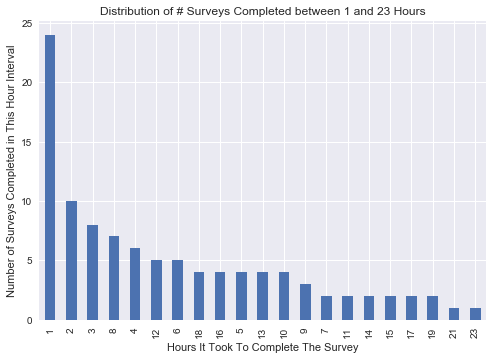

In [85]:
time_hours.plot.bar()
plt.title('Distribution of # Surveys Completed between 1 and 23 Hours')
plt.xlabel('Hours It Took To Complete The Survey')
plt.ylabel('Number of Surveys Completed in This Hour Interval')
plt.show()

There are a total of 102 surveys (completed and uncompleted) that took longer than between 1 hour and 1 day to submit. Of which, 24 of them were completed within the first hour. 

#### Minute

In [195]:
time[time['diff_hour'] == 0]

,Response_ID,Time_Started,Date_Submitted,Status,IP_Address,Longitude,Latitude,ts_year,ts_month,ts_day,ts_hour,ts_minute,ts_dayofweek,ds_year,ds_month,ds_day,ds_hour,ds_minute,ds_dayofweek,timediff,diff_year,diff_month,diff_day,diff_hour,diff_minute
0,237,2016-05-11 16:08:48,2016-05-11 16:10:12,Complete,70.214.110.234,-73.950302,40.762501,2016,5,11,16,8,2,2016,5,11,16,10,2,1970-01-01 00:01:24,0,0,0,0,1
1,238,2016-05-11 16:25:06,2016-05-11 16:25:31,Partial,67.244.79.198,-73.942200,40.839901,2016,5,11,16,25,2,2016,5,11,16,25,2,1970-01-01 00:00:25,0,0,0,0,0
2,239,2016-05-11 17:12:45,2016-05-11 17:17:49,Complete,70.208.225.241,-84.299400,39.352200,2016,5,11,17,12,2,2016,5,11,17,17,2,1970-01-01 00:05:04,0,0,0,0,5
3,240,2016-05-11 17:21:23,2016-05-11 17:22:37,Complete,70.198.45.195,-96.242897,41.102798,2016,5,11,17,21,2,2016,5,11,17,22,2,1970-01-01 00:01:14,0,0,0,0,1
4,241,2016-05-11 17:40:15,2016-05-11 17:41:38,Complete,68.36.53.31,-83.718803,42.641399,2016,5,11,17,40,2,2016,5,11,17,41,2,1970-01-01 00:01:23,0,0,0,0,1
5,242,2016-05-11 17:51:37,2016-05-11 17:56:24,Complete,108.95.176.11,-83.084602,39.964100,2016,5,11,17,51,2,2016,5,11,17,56,2,1970-01-01 00:04:47,0,0,0,0,4
6,243,2016-05-11 18:03:50,2016-05-11 18:07:14,Complete,198.223.224.229,-97.821999,37.750999,2016,5,11,18,3,2,2016,5,11,18,7,2,1970-01-01 00:03:24,0,0,0,0,3
7,244,2016-05-11 18:21:34,2016-05-11 18:27:01,Complete,107.72.162.100,-80.143402,26.122299,2016,5,11,18,21,2,2016,5,11,18,27,2,1970-01-01 00:05:27,0,0,0,0,5
8,245,2016-05-11 18:22:56,2016-05-11 18:25:00,Complete,208.54.86.185,-97.108101,32.735699,2016,5,11,18,22,2,2016,5,11,18,25,2,1970-01-01 00:02:04,0,0,0,0,2
9,246,2016-05-11 18:36:37,2016-05-11 18:37:48,Complete,50.90.45.187,-86.077904,39.974400,2016,5,11,18,36,2,2016,5,11,18,37,2,1970-01-01 00:01:11,0,0,0,0,1


In [93]:
#creating new data frame for time where surveys are completed in minutes (less than 1 hour)
minutes = time[time['diff_hour'] == 0]

In [94]:
minutes.loc[minutes['diff_minute'] <= 1].shape

(2917, 25)

In [100]:
minutes.head(2)

,Response_ID,Time_Started,Date_Submitted,Status,IP_Address,Longitude,Latitude,ts_year,ts_month,ts_day,ts_hour,ts_minute,ts_dayofweek,ds_year,ds_month,ds_day,ds_hour,ds_minute,ds_dayofweek,timediff,diff_year,diff_month,diff_day,diff_hour,diff_minute
0,237,2016-05-11 16:08:48,2016-05-11 16:10:12,Complete,70.214.110.234,-73.950302,40.762501,2016,5,11,16,8,2,2016,5,11,16,10,2,1970-01-01 00:01:24,0,0,0,0,1
1,238,2016-05-11 16:25:06,2016-05-11 16:25:31,Partial,67.244.79.198,-73.942200,40.839901,2016,5,11,16,25,2,2016,5,11,16,25,2,1970-01-01 00:00:25,0,0,0,0,0


In [98]:
time_minutes = minutes.diff_minute.value_counts()
time_minutes

# 4957 surveys were completed in 2 mins or under (0,1,2 mins)

1     2356
2     2040
3      943
0      561
4      405
5      223
6      110
7       59
8       34
9       28
10      21
12      19
11      19
13      16
14      10
15       9
19       8
23       7
16       6
18       5
27       5
17       5
41       5
21       5
25       5
32       4
30       3
33       3
20       3
29       3
39       2
58       2
38       2
31       2
24       2
28       2
36       1
47       1
40       1
44       1
48       1
56       1
45       1
22       1
34       1
42       1
35       1
37       1
Name: diff_minute, dtype: int64

Bar Chart for Surveys Submitted in Minute Time Intervals

In [434]:
minute_interval = minutes['diff_minute'].value_counts().index.tolist()
surveys_by_minute = minutes['diff_minute'].value_counts()

In [243]:
data = [go.Bar(
            x= minute_interval,
            y= surveys_by_minute,
    marker=dict(color='rgb(100,200,100)')
)]

layout = go.Layout(
    xaxis=dict(title='Minutes Taken to Submit Survey'),
    yaxis=dict(title= 'Number of Surveys'),  
    title = 'Surveys Submitted in the First 59 Minutes',
)
  
;

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='basic-bar')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~divyasriram/0 or inside your plot.ly account where it is named 'basic-bar'


In [33]:
time_minutes.shape

(48,)

Looks like most of the surveys were submitted (completed or uncompleted) in less than 5 mintues. 

### Hypothesis : After one point, more time taken to submit a survey isn't going to necessarily improve results. (Results = # questions answered)

In [216]:
#to test hypothesis we need new data frame with all columns (and new columns created in time data frame)
survey['diff_month'] = time_orig['diff_month']
survey['diff_day'] = time_orig['diff_day']
survey['diff_hour'] = time_orig['diff_hour']
survey['diff_minute'] = time_orig['diff_minute']



In [217]:
survey.head(1)

,Response_ID,Time_Started,Date_Submitted,Status,Referer,Extended_Referer,SessionID,User_Agent,Extended_User_Agent,IP_Address,Longitude,Latitude,Country,City,State_Region,Postal,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Conversation_Hash,Returnee_to_Survey__skip_Demographics_,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Ok_To_Ask_Demographic_Questions,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In,diff_month,diff_day,diff_hour,diff_minute
0,237,2016-05-11 16:08:48,2016-05-11 16:10:12,Complete,NaN,NaN,1462997328_57339150aa5496.57049364,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,70.214.110.234,-73.950302,40.762501,United States,New York,NY,10044,NaN,NaN,NaN,More hopeful,More confident,NaN,NaN,o1Qwj,0.0,10.0,Yes,5 (strongly agree),5 (strongly agree),5 (strongly agree),5 (strongly agree),"OK, show me the questions",25 - 34,Male,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1


In [218]:
#new dataframe to test hypothesis needs all columns AND filtered to only include surveys completed in less than 2 mins
time_vs_answers = survey
time_vs_answers['Time_Started'] = pd.to_datetime(time_vs_answers['Time_Started'])
time_vs_answers['Date_Submitted'] = pd.to_datetime(time_vs_answers['Date_Submitted'])
time_vs_answers = time_vs_answers.loc[time_vs_answers['diff_month'] == 0]
time_vs_answers = time_vs_answers[(time_vs_answers['diff_day'] < 1) | 
                    ((time_vs_answers['diff_day'] ==1) & (time_vs_answers['Date_Submitted'].dt.time < time_vs_answers['Time_Started'].dt.time))]

time_vs_answers = time_vs_answers[time_vs_answers['diff_hour'] <= 1]
time_vs_answers = time_vs_answers[time_vs_answers['diff_hour'] == 0]
lessthan2 = time_vs_answers[time_vs_answers['diff_minute'] <= 1]



In [219]:
lessthan2.shape

(2917, 51)

In [190]:
lessthan2.head(1)

,Response_ID,Time_Started,Date_Submitted,Status,Referer,Extended_Referer,SessionID,User_Agent,Extended_User_Agent,IP_Address,Longitude,Latitude,Country,City,State_Region,Postal,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Conversation_Hash,Returnee_to_Survey__skip_Demographics_,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Ok_To_Ask_Demographic_Questions,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In,diff_month,diff_day,diff_hour,diff_minute
0,237,2016-05-11 16:08:48,2016-05-11 16:10:12,Complete,NaN,NaN,1462997328_57339150aa5496.57049364,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,70.214.110.234,-73.950302,40.762501,United States,New York,NY,10044,NaN,NaN,NaN,More hopeful,More confident,NaN,NaN,o1Qwj,0.0,10.0,Yes,5 (strongly agree),5 (strongly agree),5 (strongly agree),5 (strongly agree),"OK, show me the questions",25 - 34,Male,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1


Now we don't need all the time difference columns, so let's drop all but the diff_minute. And let's drop some of the other columns.

In [191]:
drop_time_columns = ['Status', 'Referer', 'Extended_Referer','SessionID', 'User_Agent', 'Extended_User_Agent', 'IP_Address', 'Longitude', 'Latitude', 'Country',
                     'City', 'State_Region', 'Postal', 'Conversation_Hash', 'Returnee_to_Survey__skip_Demographics_', 
                     'Ok_To_Ask_Demographic_Questions','diff_month', 'diff_day', 'diff_hour']
time_vs_answers = time_vs_answers.drop(drop_time_columns, 1)
lessthan2 = lessthan2.drop(drop_time_columns, 1)


To test the hypothesis, we don't need all the columns, just the important ones. We'll choose the following questions and say that if the responder doesn't have NaN for these questions. (We won't include write in questions, since those generally less likely to be completed in 2 mins, an assumption we're making). We'll have to query each of these one at a time (try to find a more efficient way of doing this later).

(1) (Feelings) At least one of these 7 options should be filled out (aka not all 7 can be NaN): 
    
    Less_Alone	
    
    Less_Depressed	
    
    Less_Overwhelmed	
    
    More_Hopeful	
    
    More_Confident	
    
    More_In_Control	
    
    None_Of_These

(2) Likely_To_Recommend

(3) Shared_Secret_Stuff

(4) Counselor_Concerned_WellBeing	

(5) Counselor_Cared_Uncomf_Things	

(6) Counselor_Understood_Me

(7) New_Ways_To_Think

(8) Age

(9) At least one of these 2 options should be filled out (aka not all 2 can be NaN)

    Gender
    
    Gender_Other_Write_In
 
(10) At least one of these 2 options should be filled out (aka not all 2 can be NaN)
    
    Sexual_Orientation_Options	
    
    Sexual_Orientation_Write_In
    
(11) 

    Race_Pref_Not_Answer
    
    White
    
    Black_AfAm
    
    Hispanic	
    
    Middle_Eastern	
    
    Asian	
    
    Native_Indian_Alaskan	
    
    Native_Hawaiian_or_Other_Pacific_Islander	
    
    Other_Race_Option
    
    Other_Race_Write_In

In [192]:
lessthan2.head(2)

,Response_ID,Time_Started,Date_Submitted,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In,diff_minute
0,237,2016-05-11 16:08:48,2016-05-11 16:10:12,NaN,NaN,NaN,More hopeful,More confident,NaN,NaN,10.0,Yes,5 (strongly agree),5 (strongly agree),5 (strongly agree),5 (strongly agree),25 - 34,Male,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,238,2016-05-11 16:25:06,2016-05-11 16:25:31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


Checking to see how many surveys are completed in 2 mins or less AND answered the questions about CTL/counselor

In [193]:
lessthan2 = lessthan2.loc[(lessthan2['Less_Alone'].notnull()) | (lessthan2['Less_Depressed'].notnull()) | (lessthan2['Less_Overwhelmed'].notnull()) |
                         (lessthan2['More_Hopeful'].notnull()) | (lessthan2['More_Confident'].notnull()) | (lessthan2['More_In_Control'].notnull()) |
                         (lessthan2['None_Of_These'].notnull())]



In [194]:
lessthan2 = lessthan2.loc[(lessthan2['Likely_To_Recommend'].notnull())]

In [195]:
lessthan2 = lessthan2.loc[(lessthan2['Shared_Secret_Stuff'].notnull())]

In [196]:
lessthan2 = lessthan2.loc[(lessthan2['Counselor_Concerned_WellBeing'].notnull())]

In [197]:
lessthan2 = lessthan2.loc[(lessthan2['Counselor_Cared_Uncomf_Things'].notnull())]

In [198]:
lessthan2 = lessthan2.loc[(lessthan2['Counselor_Understood_Me'].notnull())]

In [199]:
lessthan2 = lessthan2.loc[(lessthan2['New_Ways_To_Think'].notnull())]

Checking to see how many surveys are completed in 2 mins or less AND answered the questions about CTL/counselor AND demographic questions

In [200]:
lessthan2 = lessthan2.loc[(lessthan2['New_Ways_To_Think'].notnull())]

In [201]:
lessthan2 = lessthan2.loc[(lessthan2['Age'].notnull())]

In [202]:
lessthan2 = lessthan2.loc[(lessthan2['Gender'].notnull()) | (lessthan2['Gender_Other_Write_In'].notnull())]

In [203]:
lessthan2 = lessthan2.loc[(lessthan2['Sexual_Orientation_Options'].notnull()) | 
                          (lessthan2['Sexual_Orientation_Write_In'].notnull())]

In [204]:
lessthan2 = lessthan2.loc[(lessthan2['Race_Pref_Not_Answer'].notnull()) | 
                          (lessthan2['White'].notnull())| (lessthan2['Black_AfAm'].notnull()) |
                         (lessthan2['Hispanic'].notnull()) |(lessthan2['Middle_Eastern'].notnull()) |
                         (lessthan2['Asian'].notnull()) | (lessthan2['Native_Indian_Alaskan'].notnull()) |
                         (lessthan2['Native_Hawaiian_or_Other_Pacific_Islander'].notnull()) | 
                         (lessthan2['Other_Race_Option'].notnull()) | (lessthan2['Other_Race_Write_In'].notnull())]

In [205]:
lessthan2.shape

(5287, 32)

(The following numbers were creating using the system above, by querying with different survey completion times).

Overall:

1 day or less:

    7052 surveys were submitted in 1 day or less.
    5346 surveys had answers to questions
    (99.7% of total surveys submitted in 1 day)
    (75.6% of total surveys answered questions - 5346/7073)

1 hour or less:
    
    6968 surveys were submitted in 1 hour or less
    5287 surveys had answers to questions
    (98.5% of total surveys submitted in 1 day)
    (74.7% of total surveys answered questions - 5287/7073)

10 minute mark

    6780 surveys were submitted in 10 minutes or less.
    5142 surveys had answers to questions
    (95.8% of total surveys submitted in 10 minutes)
    (72.7% of total surveys answered questions - 5142/7073)

5 minute mark

    6528 surveys were submitted in 5 minutes or less.
    4933 surveys had answers to questions
    (92.9% of total surveys submitted in 5 minutes)
    (69.7% of total surveys answered questions - 4933/6528)

2 minute mark

    4957 surveys were submitted in 2 minutes or less. 
    3529 surveys had answers to questions
    (70.1% of totaly surveys submitted in 2 minutes or less)
    (49.89% of total surveys answered questions - 3529/7073)
    
1 minute mark
    
    2917 surveys were submited in 1 minute or less.
    1736 surveys had answers to questions
    (41.1% of totaly surveys submitted in 1 minute or less)
    (24.5% of total surveys answered questions - 1736/7073)


Less Than 1 minute

    561 surveys were submitted in less than 1 minute.
    28  surveys had answers to questions
    (7.9% of totaly surveys submitted less than 1 minute)
    (0.4% of total surveys answered questions - 1736/7073)

In [602]:
# plot of surveys submitted and answered completed vs time intervals


trace1 = go.Bar(
    x=['Less Than 1 Min', '1 Minute or Less', '2 Minutes or Less', '5 Minutes or Less', '10 Minutes or Less', '1 Hour or Less','1 Day or Less'],
    y=[561, 2917, 4957, 6528, 6780, 6968, 7052],
    name='Surveys Submitted'
)
trace2 = go.Bar(
    x=['Less Than 1 Min', '1 Minute or Less', '2 Minutes or Less', '5 Minutes or Less', '10 Minutes or Less', '1 Hour or Less', '1 Day or Less'],
    y=[28, 1736, 3529, 4933, 5142, 5287, 5346],
    name='Survey Answers Completed'
)

data = [trace1, trace2]
layout = {
  'xaxis': {'title': 'Time Taken to Submit Survey'},
  'yaxis': {'title': 'Number of Surveys'},
  'barmode': 'group',
  'title': 'Surveys Submitted and Answers Completed vs Time Intervals'
};


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')



Let's see exactly the differences in survey submissions and answer completions between time intervals.

In [603]:
# y values represent differences (# surveys) between time intervals (calculated by hand)

trace1 = go.Bar(
    x=['  < 1 min --> 1 min  ', '1 min --> 2 min', '  2 min --> 5 min  ', '  5 min --> 10 min  ', '  10 min --> 1 hour  ', '  1 Hour --> 1 day  '],
    y=[2356, 2040, 1571, 252, 188, 84],
    name='Surveys Submitted',
    marker=dict(color='rgb(238, 177, 177)')
)
trace2 = go.Bar(
    x=['  < 1 min --> 1 min  ', '1 min --> 2 min','  2 min --> 5 min  ', '  5 min --> 10 min  ', '  10 min --> 1 hour  ', '  1 Hour --> 1 day  '],
    y=[1708, 1793, 1404, 209, 145, 59],
    name='Survey Answers Completed',
    marker=dict(color='#A2D5F2')
)

data = [trace1, trace2]
layout = {
  'xaxis': {'title': 'Time Taken to Submit Survey'},
  'yaxis': {'title': 'Increase Number of Surveys Because of More Time'},
  'barmode': 'group',
  'title': 'Increase in Surveys Submitted and Answers Completed Between Time Intervals'
};


fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

My hypothesis was:  After one point, more time taken to submit a survey isn't going to necessarily improve results. (Results = # questions answered)

Result: it seems like it was generally correct. 

In fact, by the 5 minute mark, it seems like the growth in both submission of surveys and completion of answers stops growing very much with prolonged time.

Considering that any insight that's made (in this document) comes from information gathered by the survey, I think it's important to consider how to make the survey as effective as possible. For future versions of this survey, a completion time of about 5 mins on average seems to be an ideal length to optimize getting back completed answers to the survey. Otherwise the length of the survey can intimidate people and make them reluctant to (1) submit a survey (2) complete most/all questions.

# ------------------------------------------------------------------------------------------

# Conversation Questions - not included in presentation

In [135]:
survey.head(1)

,Response_ID,Time_Started,Date_Submitted,Status,Referer,Extended_Referer,SessionID,User_Agent,Extended_User_Agent,IP_Address,Longitude,Latitude,Country,City,State_Region,Postal,Less_Alone,Less_Depressed,Less_Overwhelmed,More_Hopeful,More_Confident,More_In_Control,None_Of_These,Conversation_Hash,Returnee_to_Survey__skip_Demographics_,Likely_To_Recommend,Shared_Secret_Stuff,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me,New_Ways_To_Think,Ok_To_Ask_Demographic_Questions,Age,Gender,Gender_Other_Write_In,Sexual_Orientation_Options,Sexual_Orientation_Write_In,Race_Pref_Not_Answer,White,Black_AfAm,Hispanic,Middle_Eastern,Asian,Native_Indian_Alaskan,Native_Hawaiian_or_Other_Pacific_Islander,Other_Race_Option,Other_Race_Write_In
0,237,5/11/2016 16:08:48,5/11/2016 16:10:12,Complete,NaN,NaN,1462997328_57339150aa5496.57049364,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,Mozilla/5.0 (iPhone; CPU iPhone OS 9_2_1 like ...,70.214.110.234,-73.950302,40.762501,United States,New York,NY,10044,NaN,NaN,NaN,More hopeful,More confident,NaN,NaN,o1Qwj,0.0,10.0,Yes,5 (strongly agree),5 (strongly agree),5 (strongly agree),5 (strongly agree),"OK, show me the questions",25 - 34,Male,NaN,Heterosexual or straight,NaN,NaN,White,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [146]:
survey.Counselor_Concerned_WellBeing.value_counts()

5 (strongly agree)                3846
4 (somewhat agree)                1767
3 (neither agree nor disagree)     596
1 (strongly disagree)              309
2 (somewhat disagree)              277
Name: Counselor_Concerned_WellBeing, dtype: int64

### Sanity Check Hypothesis : My hypothesis is that if the responder liked counselor , then they will refer. Let's see if this sentiment is conveyed in the survey

OVERALL:

4516 / 5708 people who would refer CTL thought their counselors were good/great - all 3 categories (79.1%)
57 / 5708 people who would refer CTL thought their counselors were not so great - all 3 categories (1%)

------Individual Breakdown------

(1) 5708 / 7073 responders people will recommend (>5/10)

(2) 5140 / 5708 people thought their counselors were concerned about them and would refer CTL (>3/5)

    149 / 5708 people didn't think their counselors were concerned about them and would still refer CTL

    89 / 5708 people didn't answer the question and would still refer CTL


(3) 5042 / 5708 people thought their counselors cared when they shared uncomfortable thing and would refer CTL
    
    551 / 5708 people thought their counselors didn't cared when they shared uncomfortable thing and would still refer CTL

    115 / 5708 didn't answer the question and would still refer CTL


(4) 4903 / 5708 people thought their counselors understood them and would refer CTL

    685 / 5708 people thought their counselors didn't understand them and would still refer CTL
    
    120 / 5708 didn't answer the question and would still refer CTL



In [142]:
#checking relation between 'likely to recommend' and 'counselor understood me'
counselor = survey[['Likely_To_Recommend', 'Counselor_Concerned_WellBeing', 'Counselor_Cared_Uncomf_Things','Counselor_Understood_Me']]
counselor


(7073, 4)

In [149]:
counselor = counselor.replace(['5 (strongly agree)', '4 (somewhat agree)', '3 (neither agree nor disagree)', '2 (somewhat disagree)', '1 (strongly disagree)'], 
                     [5,4,3,2,1])



In [151]:
counselor.head(2)

,Likely_To_Recommend,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me
0,10.0,5.0,5.0,5.0
1,NaN,NaN,NaN,NaN


In [141]:
#let's see how many people are likely to refer (>5/10)
counselor.loc[(counselor['Likely_To_Recommend'] > 5.0)]

,Likely_To_Recommend,Counselor_Concerned_WellBeing,Counselor_Cared_Uncomf_Things,Counselor_Understood_Me
0,10.0,5 (strongly agree),5 (strongly agree),5 (strongly agree)
2,6.0,5 (strongly agree),5 (strongly agree),5 (strongly agree)
6,10.0,5 (strongly agree),5 (strongly agree),5 (strongly agree)
7,10.0,4 (somewhat agree),4 (somewhat agree),4 (somewhat agree)
8,10.0,5 (strongly agree),5 (strongly agree),5 (strongly agree)
9,10.0,5 (strongly agree),5 (strongly agree),5 (strongly agree)
10,6.0,4 (somewhat agree),3 (neither agree nor disagree),4 (somewhat agree)
13,10.0,5 (strongly agree),5 (strongly agree),5 (strongly agree)
14,10.0,NaN,NaN,NaN
15,10.0,5 (strongly agree),5 (strongly agree),5 (strongly agree)


In [143]:
#5708 / 7073 responders people will recommend (>5/10)
counselor.loc[counselor['Likely_To_Recommend'] > 5.0].shape

(5708, 4)

Likely To Recommend + Counselor Concerened About Well Being

In [153]:
#5140 / 5708 people thought their counselors were concerned about them and would refer CTL
counselor.loc[(counselor['Likely_To_Recommend'] > 5.0) & (counselor['Counselor_Concerned_WellBeing'] > 3.0)].shape

(5140, 4)

In [160]:
# 149 / 5708 people didn't think their counselors were concerned about them and would still refer CTL
counselor.loc[(counselor['Likely_To_Recommend'] > 5.0) & (counselor['Counselor_Concerned_WellBeing'] <= 3.0)].shape

(479, 4)

In [162]:
# 89 / 5708 people didn't answer the question and would still refer CTL
counselor.loc[(counselor['Likely_To_Recommend'] > 5.0) & (counselor['Counselor_Concerned_WellBeing'].isnull())].shape

(89, 4)

Likely To Recommend + Counselor Cared When Uncomf Things Were Shared

In [156]:
#5042 / 5708 people thought their counselors cared when they shared uncomfortable thing and would refer CTL
counselor.loc[(counselor['Likely_To_Recommend'] > 5.0) & (counselor['Counselor_Cared_Uncomf_Things'] > 3.0)].shape


(5042, 4)

In [163]:
#551 / 5708 people thought their counselors didn't cared when they shared uncomfortable thing and would still refer CTL
counselor.loc[(counselor['Likely_To_Recommend'] > 5.0) & (counselor['Counselor_Cared_Uncomf_Things'] <= 3.0)].shape

(551, 4)

In [164]:
#115 / 5708 didn't answer the question and would still refer CTL
counselor.loc[(counselor['Likely_To_Recommend'] > 5.0) & (counselor['Counselor_Cared_Uncomf_Things'].isnull())].shape

(115, 4)

Likely To Recommend + Counselor Understood Me

In [158]:
#4903 / 5708 people thought their counselors understood them and would refer CTL
counselor.loc[(counselor['Likely_To_Recommend'] > 5.0) & (counselor['Counselor_Understood_Me'] > 3.0)].shape


(4903, 4)

In [165]:
#685 / 5708 people thought their counselors didn't understand them and would still refer CTL
counselor.loc[(counselor['Likely_To_Recommend'] > 5.0) & (counselor['Counselor_Understood_Me'] <= 3.0)].shape

(685, 4)

In [166]:
#120 / 5708 didn't answer the question and would still refer CTL
counselor.loc[(counselor['Likely_To_Recommend'] > 5.0) & (counselor['Counselor_Understood_Me'].isnull())].shape

(120, 4)

OVERALL

In [167]:
# all categories good + yes refer
#4516 / 5708 people who would refer CTL thought their counselors were good/great
counselor.loc[(counselor['Likely_To_Recommend'] > 5.0) & (counselor['Counselor_Concerned_WellBeing'] > 3.0) & 
            (counselor['Counselor_Cared_Uncomf_Things'] > 3.0) & (counselor['Counselor_Understood_Me'] > 3.0) ].shape

(4516, 4)

In [169]:
# all categories bad + still yet refer
#57/ 5708 people who would refer CTL thought their counselors were not so good/great
counselor.loc[(counselor['Likely_To_Recommend'] > 5.0) & (counselor['Counselor_Concerned_WellBeing'] < 3.0) & 
            (counselor['Counselor_Cared_Uncomf_Things'] < 3.0) & (counselor['Counselor_Understood_Me'] < 3.0) ].shape

(57, 4)